### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
trainX.shape

(60000, 28, 28)

#### Change train and test labels into one-hot vectors

In [0]:
trainY1 = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY1 = tf.keras.utils.to_categorical(testY, num_classes=10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [5]:
from keras.models import Sequential
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

Using TensorFlow backend.


#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [6]:
#add 1 Fully connected layer
model.add(tf.keras.layers.Dense(200, activation='relu'))

W0825 06:29:00.277539 140035208046464 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#add 1 Fully connected layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
#drop out layer
model.add(tf.keras.layers.Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
______________________________________________

In [12]:
#Train the model
model.fit(trainX,trainY1,          
          validation_data=(testX,testY1),
          epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2624 - acc: 0.9205 - val_loss: 0.2322 - val_acc: 0.9591
Epoch 2/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.1329 - acc: 0.9602 - val_loss: 0.3894 - val_acc: 0.9665
Epoch 3/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.1010 - acc: 0.9692 - val_loss: 0.3284 - val_acc: 0.9685
Epoch 4/10
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0827 - acc: 0.9742 - val_loss: 0.3257 - val_acc: 0.9691
Epoch 5/10
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0715 - acc: 0.9767 - val_loss: 0.3617 - val_acc: 0.9707
Epoch 6/10
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0606 - acc: 0.9806 - val_loss: 0.4414 - val_acc: 0.9730
Epoch 7/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0567 - acc: 0.9824 

In [13]:
#Train the model
model.fit(trainX,trainY1,          
          validation_data=(testX,testY1),
          epochs=10,batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0383 - acc: 0.9884 - val_loss: 0.6615 - val_acc: 0.9728
Epoch 2/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0391 - acc: 0.9873 - val_loss: 0.4577 - val_acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0366 - acc: 0.9892 - val_loss: 0.3053 - val_acc: 0.9721
Epoch 4/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.0351 - acc: 0.9891 - val_loss: 0.4234 - val_acc: 0.9722
Epoch 5/10
60000/60000 [==============================] - 11s 180us/sample - loss: 0.0342 - acc: 0.9895 - val_loss: 0.5506 - val_acc: 0.9728
Epoch 6/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0322 - acc: 0.9902 - val_loss: 0.5120 - val_acc: 0.9695
Epoch 7/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0284 - acc: 0.9910 

In [14]:
model.evaluate(testX, testY1)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3974 - acc: 0.9707


[0.39743783349228445, 0.9707]

In [15]:
y_pred= model.predict(testX)
print(y_pred)
print(y_pred[0])

[[3.64267360e-21 5.13240291e-16 5.50342684e-17 ... 1.00000000e+00
  4.12937706e-20 5.29492179e-11]
 [6.44875252e-25 3.06446926e-20 1.00000000e+00 ... 4.53416217e-27
  1.37829010e-21 0.00000000e+00]
 [3.29102079e-20 1.00000000e+00 3.88577635e-15 ... 1.79290593e-11
  6.32047583e-14 1.20739848e-17]
 ...
 [3.43442686e-35 1.55504111e-22 1.96349987e-30 ... 6.32658620e-23
  1.30275063e-13 3.97708637e-17]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.25205115e-11 0.00000000e+00]
 [5.32762289e-30 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.91233216e-27 5.46639574e-31]]
[3.6426736e-21 5.1324029e-16 5.5034268e-17 1.5612081e-14 1.3273374e-18
 6.3210323e-17 2.7666496e-27 1.0000000e+00 4.1293771e-20 5.2949218e-11]


In [16]:
import numpy as np
prediction = np.argmax(y_pred)
prediction

7

In [18]:

out=[]
for val in y_pred:    
    out.append(np.argmax(val))
print(out)
      
    

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 5, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 5, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

validation accuracy :97.07 %
Train accuracy : 99.19

label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 1
label for each of the below image: 0
label for each of the below image: 4
label for each of the below image: 1
label for each of the below image: 4
label for each of the below image: 9
label for each of the below image: 5
label for each of the below image: 9


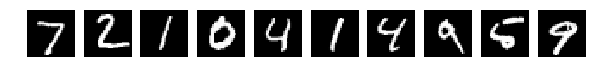

In [22]:
import numpy as np
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(testX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(testY1[0:10][i])))
plt.show()
